<a href="https://colab.research.google.com/github/sheng13/school-project/blob/main/keras_CNN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 727,114 (2.77 MB)

 Trainable params: 727,114 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cifar10=keras.datasets.cifar10
(train_data, train_label), (test_data, test_label) = cifar10.load_data()
train_label_original=train_label
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/tmp/ipython-input-3957733118.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(category[int(train_label_original[0])])


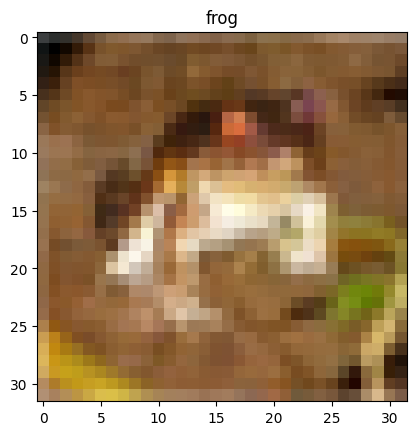

[6]


In [ ]:
import matplotlib.pyplot as plt
category=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.imshow(train_data[0])
plt.title(category[int(train_label_original[0])])
plt.show()
print(train_label_original[0])

In [ ]:
train_history=model.fit(train_data,train_label,epochs=30,batch_size=512)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 631s 6s/step - accuracy: 0.1570 - loss: 44.6552
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 662s 6s/step - accuracy: 0.2225 - loss: 2.5130
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 605s 6s/step - accuracy: 0.3191 - loss: 2.0012
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 634s 6s/step - accuracy: 0.3450 - loss: 1.9039
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 638s 6s/step - accuracy: 0.4273 - loss: 1.6763
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 683s 6s/step - accuracy: 0.4900 - loss: 1.4941
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 624s 6s/step - accuracy: 0.5507 - loss: 1.3119
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 622s 6s/step - accuracy: 0.5931 - loss: 1.1970
Epoch 9/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 681s 6s/step - accuracy: 0.6535 - loss: 1.0152
Epoch 10/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 627s 6s/step - accuracy: 0.6930 - loss: 0.9041
Epoch 11/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 675s 6s/step - accuracy: 0.7407 - loss: 0.7629
Epoch 12/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 614s 6s/step - accuracy

In [ ]:
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.6023 - loss: 3.4866
0.5983999967575073


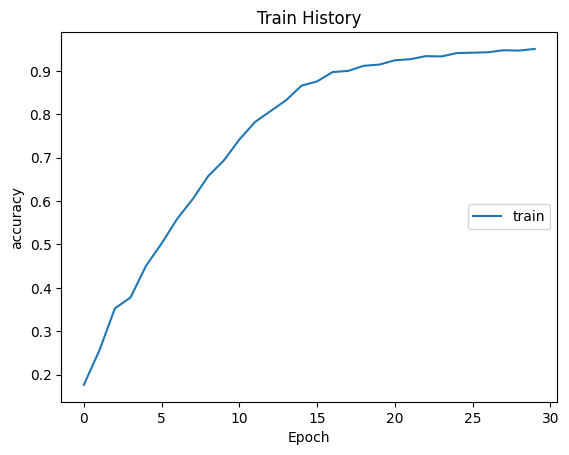

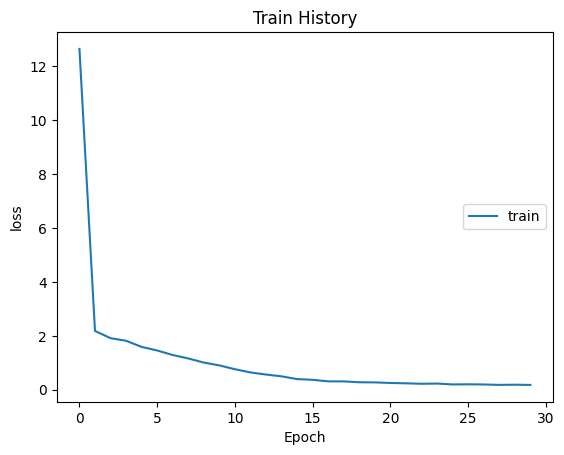

In [ ]:
#繪製正確性與損失歷史圖
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train):
    plt.plot(train_history.history[train])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy')
show_train_history(train_history, 'loss')